In [ ]:
import pandas as pd
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load dataset
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
# Add a column in each dataset before merging
train['Type'] = 'train'
test['Type'] = 'test'
# Merge train and test
data = train._append(test, sort=False)
# Explore the initial data, first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [ ]:
# Extract the Title
for name_string in data['Name']:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Replace the rare titles
mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Major': 'Other',
           'Col': 'Other', 'Dr' : 'Other', 'Rev' : 'Other', 'Capt': 'Other',
           'Jonkheer': 'Royal', 'Sir': 'Royal', 'Lady': 'Royal',
           'Don': 'Royal', 'Countess': 'Royal', 'Dona': 'Royal'}
data.replace({'Title': mapping}, inplace=True) # Make the change permanent
#data.head(n=20)
#Consolidate Parch and SibSp within a single column, named Family_Size.
#Parch - Parents and children onboard
data['Family_Size'] = (data['Parch'] + data['SibSp']).astype(int)
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train,Mr,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train,Mr,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,train,Master,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,train,Mrs,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,train,Mrs,1


In [ ]:
# Age is filled with the mean for the corresponding category
data['Age'].fillna(data.groupby(["Sex", "Pclass"])['Age'].transform("mean"), inplace=True)

#Manually add the two missing values for Embarked
# There are three possible values for Embark(on board)— Southampton, Cherbourg, and Queenstown.
data.loc[61,'Embarked'] = 'S'
data.loc[829,'Embarked'] = 'S'

# Fare is filled with the mean.
data['Fare'].fillna(data['Fare'].mean(), inplace = True)
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,train,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,train,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,train,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,train,Mr,0
5,6,0.0,3,"Moran, Mr. James",male,25.962264,0,0,330877,8.4583,NaN,Q,train,Mr,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,train,Mr,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,train,Master,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,train,Mrs,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,train,Mrs,1


In [ ]:
# Drop the variables that won't be used in the model
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

# Convert to cateogry dtype
data['Sex'] = data['Sex'].astype('category')
# Convert to category codes
data['Sex'] = data['Sex'].cat.codes
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Type,Title,Family_Size
0,0.0,3,1,22.0,7.2500,S,train,Mr,1
1,1.0,1,0,38.0,71.2833,C,train,Mrs,1
2,1.0,3,0,26.0,7.9250,S,train,Miss,0
3,1.0,1,0,35.0,53.1000,S,train,Mrs,1
4,0.0,3,1,35.0,8.0500,S,train,Mr,0


In [ ]:
# Encode the categorical values
categorical = ['Embarked', 'Title', 'Pclass']
for cat in categorical:
    data = pd.concat([data,
                    pd.get_dummies(data[cat], prefix=cat)], axis=1)
    del data[cat]

# Scale the numerical values
continuous = ['Age', 'Fare', 'Family_Size']
scaler = StandardScaler()
for val in continuous:
    data[val] = data[val].astype('float64')
    data[val] = scaler.fit_transform(data[val].values.reshape(-1, 1))

# Checkout the data after all transformations have been applied
data.head()

,Survived,Sex,Age,Fare,Type,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Royal,Pclass_1,Pclass_2,Pclass_3
0,0.0,1,-0.560331,-0.503595,train,0.073352,False,False,True,False,False,True,False,False,False,False,False,True
1,1.0,0,0.655107,0.734503,train,0.073352,True,False,False,False,False,False,True,False,False,True,False,False
2,1.0,0,-0.256471,-0.490544,train,-0.558346,False,False,True,False,True,False,False,False,False,False,False,True
3,1.0,0,0.427212,0.382925,train,0.073352,False,False,True,False,False,False,True,False,False,True,False,False
4,0.0,1,0.427212,-0.488127,train,-0.558346,False,False,True,False,False,True,False,False,False,False,False,True


In [ ]:
# Split the train and test dataset
train = data[data['Type'] == 'train'].drop(columns = ['Type', 'Survived'])
train_ = data[data['Type'] == 'train']['Survived']
X_train = train.values
y_train = train_.values

test = data[data['Type'] == 'test'].drop(columns = ['Type', 'Survived'])
X_test = test.values
X_test = X_test.astype(np.float64, copy=False)

#Checkout the shape of the training dataset
test.head()


,Sex,Age,Fare,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Royal,Pclass_1,Pclass_2,Pclass_3
0,1,0.389230,-0.492396,-0.558346,False,True,False,False,False,True,False,False,False,False,False,True
1,0,1.338790,-0.508429,0.073352,False,False,True,False,False,False,True,False,False,False,False,True
2,1,2.478263,-0.456465,-0.558346,False,True,False,False,False,True,False,False,False,False,True,False
3,1,-0.180507,-0.476284,-0.558346,False,False,True,False,False,True,False,False,False,False,False,True
4,0,-0.560331,-0.406194,0.705051,False,False,True,False,False,False,True,False,False,False,False,True


In [ ]:
# Simple model
model1 = keras.models.Sequential()
# 18 units is dimensionality of the output space.
# input_dim specify the size of the input
model1.add(keras.layers.Dense(18, input_dim = X_train.shape[1], activation = keras.activations.relu))
model1.add(keras.layers.Dense(8, activation = keras.activations.relu))
model1.add(keras.layers.Dense(1, activation = keras.activations.sigmoid))

# Visualize the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                306       
                                                                 
 dense_1 (Dense)             (None, 8)                 152       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 467 (1.82 KB)
Trainable params: 467 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling our model
model1.compile(optimizer = keras.optimizers.SGD(),
               loss = keras.losses.binary_crossentropy,
               metrics = [tf.keras.metrics.binary_accuracy])

In [ ]:
X_train=np.asarray (X_train).astype(np.int64)
y_train=np.asarray(y_train).astype(np.int64)
history = model1.fit(X_train, y_train, epochs=100, validation_split=0.2)
val_acc=np.mean(history.history['val_binary_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

Epoch 1/100
23/23 [==============================] - 1s 18ms/step - loss: 0.6958 - binary_accuracy: 0.5941 - val_loss: 0.6372 - val_binary_accuracy: 0.7486
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6452 - binary_accuracy: 0.7093 - val_loss: 0.5917 - val_binary_accuracy: 0.7486
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6129 - binary_accuracy: 0.6938 - val_loss: 0.5663 - val_binary_accuracy: 0.7430
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5932 - binary_accuracy: 0.7191 - val_loss: 0.5452 - val_binary_accuracy: 0.7709
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5776 - binary_accuracy: 0.7261 - val_loss: 0.5300 - val_binary_accuracy: 0.7709
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5654 - binary_accuracy: 0.7121 - val_loss: 0.5170 - val_binary_accuracy: 0.7709
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - lo

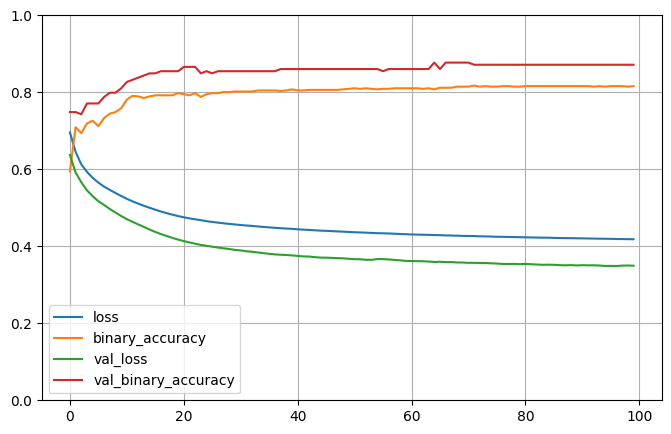

In [ ]:
# Plot the learrnng curves
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [ ]:
submission = pd.read_csv("/content/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = model1.predict(X_test)
submission['survived'] = submission['Survived'].apply(lambda x: round(x,0)).astype('int')
submission.to_csv( 'Titanic_modell. csv' )

14/14 [==============================] - 0s 6ms/step
